# Домашнее задание 1

Дедлайн по отправке - 02:00 18 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1 (7 pts)

__1.__ Скачайте с помощью кода, приведённого ниже, набор фотографий и нарисуйте какую-нибудь из них.

In [0]:
import sklearn.datasets as skldata
import matplotlib.pyplot as plt
import sklearn.decomposition as skdec
%matplotlib inline
data = skldata.fetch_olivetti_faces()
import numpy as np

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Shape of data = (400, 64, 64)


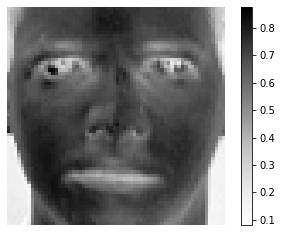

In [0]:
print("Shape of data = {}".format(data["images"].shape))
index = 0
plt.imshow(data["images"][index],  cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")

__2.__ Одним из способов обработки изображений, например для выделения наиболее важных сегментов используется метод неотрицательной матричной факторизации ([Nonnegative matrix factorization](https://arxiv.org/pdf/1401.5226.pdf)). 
Идея в том, чтобы решить следующую задачу

\begin{align*}
& \min_{W, H} \frac12 \|X - WH\|^2_F \\
\text{s.t. } & W \geq 0\\
& H \geq 0,
\end{align*}

где знак $\geq$ означает покомпонентное сравнение. 
Также матрицы $W$ и $H$ малого ранга, то есть $W \in \mathbb{R}^{m \times k}$ и $H \in \mathbb{R}^{k \times n}$, где $k$ - параметр, который необходимо настраивать.
Чем больше $k$, тем точнее приближение, но и тем дольше будет решаться задача.
Матрица $X \in \mathbb{R}^{m \times n}$, где $m$ - это число фото в нашем наборе, а $n$ - это количество пикселей в каждой картинке, то есть каждая строка матрицы $X$ - это векторизованная картинка.

**Вопросы**

1) (1 pts) является ли эта задача выпуклой и почему?

2) (1 pts) как можно интерпретировать факторы $W$ и $H$ и почему важна их покомпонентная неотрицательность?

2) $X[j, :]$ - векторизованное представление изображения - набор пикселей.  Задача приблизить вектор $X[j, :]$ c помощью $W[j, :]\cdot H$, $(W[j, :].shape = (1, r)$. Получается, что матрица $H$ является неким базисом, набором картинок, с помощью линейной комбинации которых мы приближаем исходную картинку. Именно из-зи покомпонентной неотрицательности матриц мы можем интерпретировать их как базисную матрицу, набор картинок, по которым расскладываем ($H$) и матрицу весов ($W$). Важно еще и то, что все изображения в датасете - это лица людей. Поэтому мы можем найти такую матрицу $H$, такой набор или базис. Итог: матрица $H$ - некий "базис", матрица $W$  - веса.

1) Задача является выпуклой по каждой из факторов:

$\nabla_W^2 (\frac{1}{2} \|X - WH\|_F^2) ) = HH^T$,

$\nabla_H^2 (\frac{1}{2} \|X - WH\|_F^2) ) = W^TW$,

$\forall q \in R^m \hookrightarrow q^THH^Tq = (q^TH)(q^TH)^T \geq 0 \Rightarrow HH^T \succcurlyeq 0$. Аналогично $W^TW \succcurlyeq 0$.


__3.__ Такую задачу можно решать с помощью CVXPy, если воспользоваться идеей попеременной оптимизации (alternating optimization). Идея состоит в том, чтобы на чётных итерациях решить точно задачу относительно параметра $W$ при фиксированном параметре $H$, а на нечётных наоборот: использовать решение для $W$ с предыдущей итерации в качестве фиксированного параметра и найти решение задачи относительной $H$ и так далее до сходимости.
Сначала Вам нужно инициализировать матрицы $W$ и $H$ какими-нибудь матрицами с неотрицательными элементами. От инициализации будет сильно зависеть качество решения и скорость работы методов.

**Задачи**

1) (2 pts) реализуйте с помощью CVXPy идею попеременной оптимизации для этой задачи и решите её

2) (1 pts) нарисуйте график сходимости по функции и убедитесь, что метод сошёлся или же изменение целевой функции пренебрежимо мало

3) (1 pts) поскольку размерность $H$ - $k \times n$, то каждую строку $H$ можно преобразовать в картинку аналогично тому, как были собраны строки матрицы $X$. Нарисуйте 10-50 картинок полученных из строк матрицы $H$. Что Вы заметили и как это соотносится с ответами на вопрос 2) предыдущего пункта? Используйте ```plt.colorbar()``` и цветовую схему ```plt.cm.Greys``` для более чёткого отображения значений пикселей

4) (1 pts) Нарисуйте матрицу $W$ с помощью функции ```plt.imshow``` или ```plt.spy```. Насколько сильно она заполнена и почему?

In [0]:
import cvxpy as cp

In [0]:
X = data.data

In [0]:
error = []
k = 30
n = X.shape[1]
m = X.shape[0]
#W = X[:,:k]
W = np.random.rand(m,k)
#print(W)
H = np.random.rand(k,n)
num_iter = 100
for iter_num in range(num_iter):
    if iter_num % 2 == 0:
      if iter_num != 0:
        H = cp.Variable(shape=(k, n))
        H.value = H_
        constraint = [H >= 0]
      else:
        H = cp.Variable(shape=(k, n))
        constraint = [H >= 0]
    else:
      if iter_num != 1:

        W = cp.Variable(shape=(m, k))
        W.value = W_
        constraint = [W >= 0]
      else:
        W = cp.Variable(shape=(m, k))
        constraint = [W >= 0]

    obj = cp.Minimize(cp.norm(X - W*H, 'fro'))
    prob = cp.Problem(obj, constraint)
    prob.solve(solver=cp.SCS, max_iters=1000, verbose=True)
    print('Iteration {}, norm {}'.format(iter_num, prob.value))
    error.append(prob.value)

    if iter_num % 2 == 0:
        H = H.value
        H_ = H
    else:
        W = W.value
        W_ = W

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 49274881
eps = 1.00e-04, alpha = 1.50, max_iters = 1000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 122881, constraints m = 1761281
Cones:	linear vars: 122880
	soc vars: 1638401, soc blks: 1
Setup time: 9.65e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.04e+21  7.80e+20  1.00e+00 -1.94e+23  2.79e+23  2.69e+23  6.66e-01 
    40| 3.62e-06  3.64e-06  6.83e-07  1.83e+02  1.83e+02  3.52e-16  2.36e+01 
----------------------------------------------------------------------------
St

SolverError: ignored

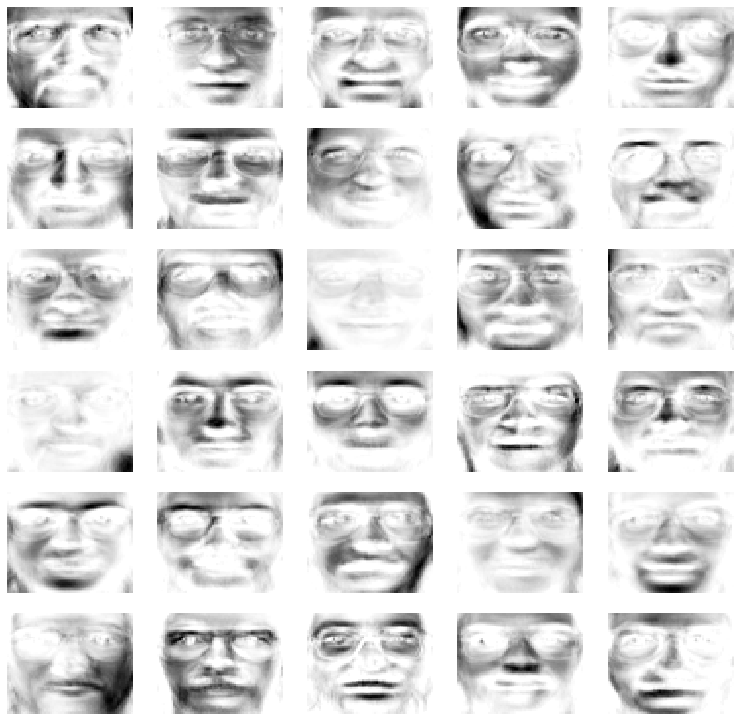

In [0]:
plt.rcParams['figure.figsize'] = (13.0, 13.0)
f, axarr = plt.subplots(6,5) 
H = H.reshape(6,5,64,64)
for i in range(6):
  for j in range(5):
    axarr[i, j].imshow(H[i,j,:,:], cmap=plt.cm.Greys, aspect = 'auto')
    _ = axarr[i, j].axis("off")

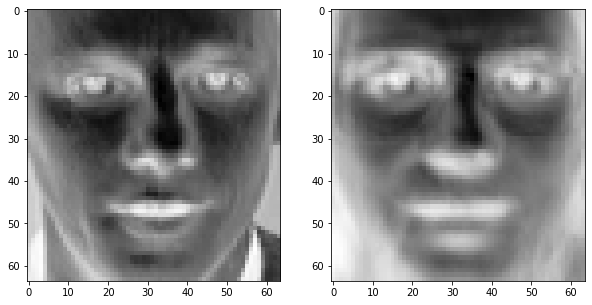

In [0]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(X[203].reshape(64,64), cmap=plt.cm.Greys, aspect = 'auto')
axarr[1].imshow(np.dot(W.value,H.reshape(30,64*64))[203].reshape(64,64), cmap=plt.cm.Greys, aspect = 'auto')

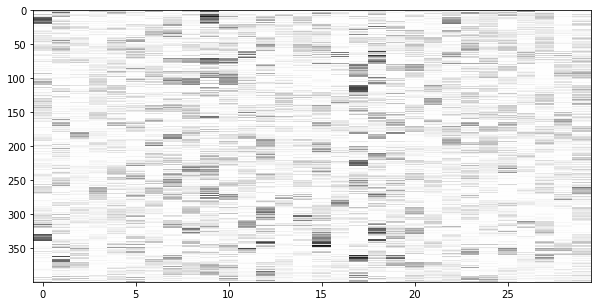

In [0]:
plt.imshow(W.value, cmap =plt.cm.Greys, aspect = 'auto')

Из изображения видно, что матрица $W$ преймущественно заполнена значениями близкими к $1$ (много белого) и лишь часть черная ( значения близкие к $0$). Вероятно это происходит из-за того, что фотографии лиц в датасете довольно похожи: лицо расположено по середине, занимает определенную площадь, примрно одинаковую для всех изображений. Все лица схожи по наличию глаз, носа, губ и так далее. Поэтому приближенная фотография - есть как будто наложение базисных (так как коэффицнты близки к 1). Темные пятна, вероятно, могут говорить о разнице в базисных и целевых изображениях. Например наличие очков и другое.

Но в общем, мне кажется, что никаких конкретных выводов по матрице сделать нельзя.

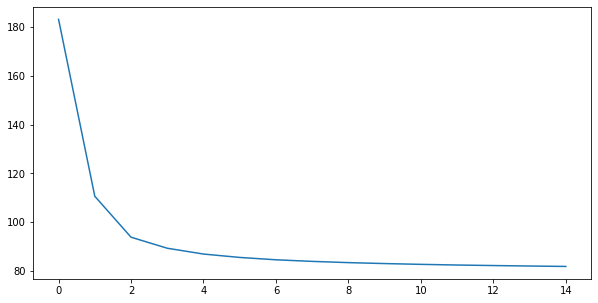

In [0]:
plt.plot(np.arange(len(error)), error)
plt.show()

## Задача 2 (14 pts)

### Управление посадкой космического корабля

В данной задаче вам предлагается поставить две задачи, связанные с посадкой ракеты.
Первая задача про то, как сэкономить топливо, вторая - про то как совершить посадку максимально быстро.
Про то, как идеи из этой задачи реализуются см. [тут](https://www.youtube.com/watch?v=2t15vP1PyoA)

В данной задаче предполагаем, что динамика челнока описывается вторым законом Ньютона

$$
mx''(t) = f(t) - mge_3,
$$

где $e_3$ - вектор $(0, 0, 1)$, $m$ - масса, предполагаем, что постоянная (отказ от этого предположения приводит к более сложной динамике), $f(t)$ - сила тяги, которую можно регулировать, $x''(t)$ - ускорение.
Также не учитываем влияние атмосферы.
Это уравнение векторное, то есть $x(t)$ и $f(t)$ - это трёхмерные векторы в каждый момент времени. 

#### Уравнения динамики получаем после дискретизации основного уравнения динамики

Для скорости получим

$$
m\frac{v_{k+1} - v_k}{h} = f_k - mge_3, \quad v_{k+1} = v_k + \frac{h}{m} f_k - hge_3
$$

аналогично для координат

$$
x' = v \quad x_{k+1} = x_k + \frac{h}{2}(v_k + v_{k+1})
$$

Схема дискретизации для связи координат и скорости получена с помощью [метода Рунге-Кутты 2-го порядка](http://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node5.html). Подробности будут на вычислительной математике. 

Точка посадки имеет координаты $(0, 0, 0)$ и для успешной посадки необходима нулевая скорость в момент посадки. Также в процессе посадки необходимо чтобы челнок не "сваливался", то есть значение координаты по высоте было больше своей проекции на плоскость $(x, y)$ в заданное число раз, то есть

$$
x_3(t) \geq \alpha \| (x_1(t), x_2(t)) \|_2.
$$

Поскольку сила тяги создаётся двигателем, который преобразует топливо, поэтому есть некоторая максимальная сила тяги, доступная кораблю, то есть

$$
\|f(t)\|_2 \leq F_{\max}.
$$

Также объём потребляемого топлива для развития силы $f(t)$ можно вычислить по формуле

$$
\gamma \int_0^T \|f(t)\|_2 dt,
$$

 где $\gamma$ - коэффициент потребления топлива, $T$ - время посадки. 
 
При дискретизации по времени можно считать, что $f(t)$ постоянно на каждом интервале $[(k-1)h; kh]$ для $k=1,\ldots,K$. Таким образом общее время посадки равно $Kh$. 

**Пункт 1**
Найти положение, скорость и силу тяги в каждый момент времени такие что общее потребление топлива минимально

1) (2 pts) Поставьте формально задачу оптимизации

2) (3 pts) Решите её с помощью CVXPy и визуализируйте решение

**Пункт 2**
Определить минимальное время за которое можно посадить челнок, то есть при фиксированном шаге дискретизации по времени $h$, нужно найти минимальное финальное время, за которое можно привести корабль в финальную точку с финальной скоростью.
Для решения этой задачи допускается решение нескольких вспомогательных задач.

3) (5 pts) Поставьте формально задачу оптимизации

4) (4 pts) Решите её с помощью CVXPy и визуализируйте решение. Сравните, полученную траекторию, с траекторией из пункта 1. 
Как сильно отсутствие требования по минимальности времени увеличивает объём потребления топлива?

$1)$ Задачу оптимизации можно записать следующим образом: $$\min\limits_{x}(\sum\limits_{k = 1}^K \|f_k\|_2)$$ $$Ax_{k+1} = Bx_k + \frac{h}{m}f_k - hge$$, 
$$ \|f(t)\|_2 \leq F_{\max}$$
$$
p_3(k) \geq \alpha \| (p_1(k), p_2(k)) \|_2 \quad \forall k = 1, .. K-1
$$

$$
p_0 = (50,50,100), v_0 = (-10, 0, -10)
$$
$$
p_K = (0,0,0), v_K = (0,0,0)
$$
где $A, B,e$ определены ниже, $x_k = \begin{Vmatrix}
  p_{x_k}\\
  p_{y_k}\\
  p_{z_k}\\
  v_{x_k}\\
  v_{y_k}\\
  v_{z_k}\\
\end{Vmatrix}, f_k = \begin{Vmatrix}
  0\\
  0\\
  0\\
  f_{x_k}\\
  f_{y_k}\\
  f_{z_k}\\
\end{Vmatrix}, $

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
import cvxpy as cvx
h=1
A = np.array([[1, 0, 0, -h/2, 0,0], 
              [0,1, 0, 0, -h/2, 0],
              [0,0,1, 0, 0, -h/2],
              [0, 0, 0, 1, 0,0],
              [0, 0, 0, 0, 1, 0], 
              [0, 0, 0, 0, 0, 1]])
B = np.array([[1, 0, 0, h/2, 0,0], 
              [0,1, 0, 0, h/2, 0],
              [0,0,1, 0, 0, h/2],
              [0, 0, 0, 1, 0,0],
              [0, 0, 0, 0, 1, 0], 
              [0, 0, 0, 0, 0, 1]])
e = np.array([0,0,0,0,0,1])
# Gravity acceleration. It is just demo value to scale the solution time!
g = 0.1
# Mass
m = 10.
# Maximum norm of forse
Fmax = 10.
# Initial position
p0 = np.array([50, 50, 100])
# Initial velocity
v0 = np.array([-10, 0, -10])
# Factor of minimum slope
alpha = 0.5
# Fuel consumption factor
gamma = 1.
# Number of discretization steps, i.e. final time equals K*h
K = 35

In [0]:

# Место для Вашего решения
x = cvx.Variable((6, K + 1))
f = cvx.Variable((6, K))
constraints = []
cost = cvx.norm(f, 'fro')
for t in range(K):
#     Create objective function and constraints in every time step
    cost_t = cvx.norm(f[:, t], 2)
    constraints += [ cost_t <= Fmax, 
              A*x[:, t+1] == B*x[:, t] + h/m * f[:,t] - h*g*e,
              x[2,t] >= alpha*cvx.norm2(x[:2, t]) ,
              f[:3, t] == np.zeros(3)]

In [0]:
# Append original state and target state
complete_constr = constraints + [x[:3,0] == p0, x[:,K] == np.zeros(6), x[3:6, 0] == v0]

In [49]:
prob = cvx.Problem(cvx.Minimize(cost), complete_constr)
prob.solve(verbose=True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -3.500e+02  +8e+03  5e-01  6e-02  1e+00  6e+01    ---    ---    1  1  - |  -  - 
 1  -6.529e+01  -1.638e+02  +2e+03  1e-01  2e-02  5e+00  2e+01  0.7936  1e-01   2  1  1 |  0  0
 2  -9.618e+01  -1.395e+02  +1e+03  6e-02  7e-03  5e+00  7e+00  0.7376  3e-01   2  2  2 |  0  0
 3  -3.782e+01  -4.529e+01  +2e+02  1e-02  1e-03  1e+00  2e+00  0.8840  1e-01   2  2  2 |  0  0
 4  +2.383e+01  +2.190e+01  +7e+01  3e-03  2e-04  4e-01  5e-01  0.7974  1e-01   2  2  2 |  0  0
 5  +3.650e+01  +3.608e+01  +2e+01  6e-04  4e-05  7e-02  1e-01  0.7680  2e-02   2  2  2 |  0  0
 6  +3.859e+01  +3.845e+01  +6e+00  2e-04  1e-05  2e-02  4e-02  0.8465  2e-01   2  2  2 |  0  0
 7  +3.973e+01  +3.969e+01  +2e+00  6e-05  3e-06  6e-03  1e-02  0.8546  2e-01   2  2  2 |  0  0
 8  +4.001e+01  +4.000e+01  +5e-01  2e-05  1e-

40.14397265151654

In [0]:
f_min = f.value

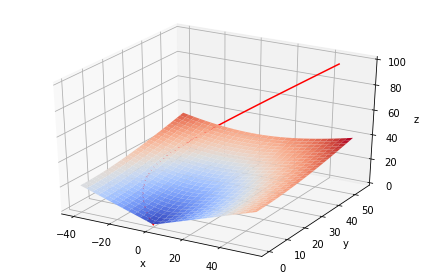

In [51]:
# use the following code to plot your trajectories
# and the glide cone (don't modify)
# -------------------------------------------------------
fig = plt.figure()
ax = fig.gca(projection='3d')
p=x[:3,:]
X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
#Have your solution be stored in p, which meana positions
ax.plot(xs=p.value[0,:],ys=p.value[1,:],zs=p.value[2,:], c="red")
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.tight_layout()

$2)$  Задачу оптимизации можно записать следующим образом: $$\min 0$$ $$Ax_{k+1} = Bx_k + \frac{h}{m}f_k - hge$$, 
$$ \|f(t)\|_2 \leq F_{\max}$$
$$
p_3(k) \geq \alpha \| (p_1(k), p_2(k)) \|_2 \quad \forall k = 1, .. K-1
$$

$$
p_0 = (50,50,100), v_0 = (-10, 0, -10)
$$
$$
p_K = (0,0,0), v_K = (0,0,0)
$$
где $x_k = \begin{Vmatrix}
  p_{x_k}\\
  p_{y_k}\\
  p_{z_k}\\
  v_{x_k}\\
  v_{y_k}\\
  v_{z_k}\\
\end{Vmatrix}, f_k = \begin{Vmatrix}
  0\\
  0\\
  0\\
  f_{x_k}\\
  f_{y_k}\\
  f_{z_k}\\
\end{Vmatrix}, $

Если задача не разрешима, то увеличиваем K. Таким образом будем иттерироваться до тех пор, пока задача не будет разрешима.

In [52]:
for i in range(22,35):
  constraints = []
  x = cvx.Variable((6, i + 1))
  f = cvx.Variable((6, i))
  p = cvx.Variable()
  p.value = 0
  for t in range(i):
    cost_t = cvx.norm(f[:, t], 2)
    constraints += [cost_t <= Fmax, 
              A*x[:, t+1] == B*x[:, t] + h/m * f[:,t] - h*g*e,
              x[2,t] >= alpha*cvx.norm2(x[:2, t]) ,
              f[:3, t] == np.zeros(3)]
  complete_constr = constraints + [x[:3,0] == p0, x[:,i] == np.zeros(6), x[3:6, 0] == v0, p == 0]
  prob = cvx.Problem(cvx.Minimize(p), complete_constr)
  prob.solve(verbose=True)
  if x.value != None:
    print(x.value)
    break



ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -2.200e+02  +3e+03  5e-01  5e-01  1e+00  3e+01    ---    ---    1  1  - |  -  - 
 1  -1.687e-08  -5.240e+01  +1e+03  1e-01  1e-01  4e+00  1e+01  0.8070  2e-01   1  1  1 |  0  0
 2  -2.439e-08  -1.294e+01  +3e+02  2e-02  2e-02  1e+00  4e+00  0.7351  1e-01   1  1  1 |  0  0
 3  -1.761e-08  -3.150e+00  +1e+02  4e-03  4e-03  4e-01  1e+00  0.8907  2e-01   1  1  1 |  0  0
 4  +2.899e-09  -1.357e+00  +4e+01  2e-03  1e-03  2e-01  4e-01  0.7374  2e-01   1  1  1 |  0  0
 5  +5.776e-08  -6.939e-01  +1e+01  2e-03  5e-04  2e-01  1e-01  0.7604  1e-01   1  1  1 |  0  0
 6  +9.698e-07  +1.440e+00  +8e-01  1e-02  3e-04  2e+00  9e-03  0.9630  3e-02   2  2  2 |  0  0
 7  +7.246e-06  +1.973e+02  +8e-03  2e-02  3e-04  2e+02  1e-04  0.9890  1e-04   2  2  2 |  0  0
 8  +1.349e-05  +1.786e+04  +9e-05  2e-02  3e-

ValueError: ignored

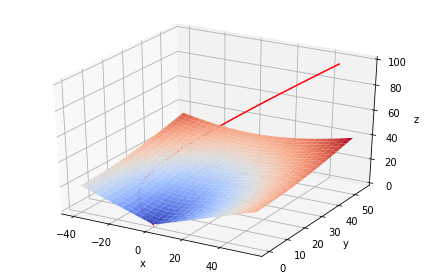

In [53]:
# use the following code to plot your trajectories
# and the glide cone (don't modify)
# -------------------------------------------------------
fig = plt.figure()
ax = fig.gca(projection='3d')
p=x[:3,:]
X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
#Have your solution be stored in p, which meana positions
ax.plot(xs=p.value[0,:],ys=p.value[1,:],zs=p.value[2,:], c="red")
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.tight_layout()

In [60]:
# сравним расходы:
print('Расход топлива при минимизации расхода:{}'.format(np.linalg.norm(f_min[3:,:])))
print('Расход топлива при минимизации времени:{}'.format(np.linalg.norm(f.value[3:,:])))

Расход топлива при минимизации расхода:40.14397276471516
Расход топлива при минимизации времени:49.856493986326505


## Задача 3 (11 pts)

### Регрессия на полных и неполных данных

Пусть вам дан набор измерений, состоящий из пар $(\mathbf{x}_i, y_i)$, где $y_i \in \mathbb{R}$, а $\mathbf{x}_i \in \mathbb{R}^n$.
Необходимо восстановить функцию, которая бы для других подобных измерений $\mathbf{x}$ предсказывала значения $y$.

1) (1 pts) Что необходимо задать для корректной постановки задачи поиска функции $f$?

2) (1 pts) Приведите 3 различных постановки и исследуйте их на выпуклость

1) Задача регрессии заключается в нахождении такой апроксимации с помощью $f: \mathbb{R^n} \rightarrow \mathbb{R}$, что погрешность (ошибка апроксимации) была минимальной. Для корректной постановки задачи требуется определить, что является ошибкой, а также нужно определить класс функций, к которому принадлежит функция $f$. Например, полиномиальная, экспоненциальная регрессия и так далее.

2) 

$1.$ Дан набор точек $\{ (x_i,y_i)\}_{i=1}^N \in \mathbb{R}^2.$ Задача найти такие $\{w_i\}_{i=1}^N$, что $$\frac{1}{N}\sum\limits_{i=1}^N(y_i - \mathbb{w}^T\mathbb{x})^2\rightarrow \min\limits_{\mathbb{w}}$$

Очевидно, что задача выпукла по $\mathbb{w}$

$2.$ Параболическая регрессия:
$$\frac{1}{N}\sum\limits_{i=1}^N(y_i - \mathbb{w}^T\mathbb{\tilde{x}})^2\rightarrow \min\limits_{\mathbb{w}}$$, где $\{w_i\}_{i=1}^N, \tilde{x} = (1,x_0, x_0^2, 1,x_1, \dots, 1,x_N,x_N^2)^T$

Также является выпуклой.

$3.$ Экспоненциальная регрессия:

 $$f(x) = a^xb$$
 $$\frac{1}{N}\sum\limits_{i=1}^N(y_i - a^{x_i}b)^2\rightarrow \min\limits_{\mathbb{w}}$$

 Также является выпуклой.

Начнём изучение этой задачи с самой простой её постановки, а именно с предположения, что $y_i \approx \mathbf{w}^{\top}\mathbf{x}$, где вектор $\mathbf{w}$ нужно найти.
Использование в качестве функции ошибки квадрата евклидовой нормы остатков приводит нас к следующей задаче

$$
\min_{\mathbf{w}} \sum_{i=1}^m (y_i - \mathbf{w}^{\top}\mathbf{x}_i)^2
$$

Если переписать эту постановку в матрично-векторный вид, то получим следующее (классическую задачу наименьших квадратов, которую мы обсуждали в прошлом семестре)

$$
\min_{\mathbf{w}} \|\mathbf{y} - X\mathbf{w}\|_2
$$

Ниже приведём код для генерации случайного примера этой задачи, то есть задаются матрица $X$ и вектор $\mathbf{y}$.  

In [0]:
import numpy as np
import cvxpy as cvx
import pandas as pd
import math
import scipy


m, n = 500, 20
np.random.seed(15)
X = np.random.randn(m, n)
w_exact = np.random.randn(n)
y = X @ w_exact + 0.1 * np.sqrt(n) * np.random.randn(m)

3) (1 pts) Ниже Вам нужно решить задачу с помощью CVXPy.

4) (2 pts) При этом проанализируйте, как изменится величина ошибки, если вместо евклидовой нормы использовать первую и Чебышёвскую. Сравните 3 числа и объясните результаты сравнения.

5) (1 pts) Сравните число итераций необходимое для решения каждой из трёх задач. Объясните, почему они так отличаются?

In [0]:
X.shape

(500, 20)

In [0]:
# 2 норма
w_2 = cvx.Variable(n)
obj = cvx.Minimize(cvx.norm2(y- X*w_2))
prob_2 = cvx.Problem(obj)
prob_2.solve(solver=cvx.SCS, max_iters=1000, verbose=True)

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 10001
eps = 1.00e-04, alpha = 1.50, max_iters = 1000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 21, constraints m = 501
Cones:	soc vars: 501, soc blks: 1
Setup time: 1.46e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 9.28e+19  6.94e+19  1.00e+00 -1.76e+21  7.15e+20  1.00e+21  1.13e-02 
    10| 1.11e-12  1.20e-11  5.35e-12  9.87e+00  9.87e+00  2.76e-16  2.33e-02 
----------------------------------------------------------------------------
Status: Solved
Timing: Solve time: 2.3

9.872479082069995

In [0]:
# 1 норма
w_1 = cvx.Variable(n)
obj = cvx.Minimize(cvx.norm(y- X*w_1, 1))
prob_1 = cvx.Problem(obj)
prob_1.solve(solver=cvx.SCS, max_iters=10000, verbose=True)

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 21000
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 520, constraints m = 1000
Cones:	linear vars: 1000
Setup time: 1.66e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.15e+20  2.38e+20  1.00e+00 -3.32e+23  6.31e+21  1.44e+23  7.92e-03 
   100| 1.68e-03  1.44e-02  4.62e-05  1.74e+02  1.74e+02  4.67e-15  4.77e-02 
   200| 6.87e-04  7.28e-03  1.00e-03  1.74e+02  1.74e+02  1.37e-13  9.21e-02 
   300| 1.84e-04  2.17e-03  1.71e-04  1.74e

174.32753357378255

In [0]:
# Чебышевская норма
w = cvx.Variable(n)
obj = cvx.Minimize(cvx.norm(y- X*w, "inf"))
prob = cvx.Problem(obj)
prob.solve(solver=cvx.SCS, max_iters=10000, verbose=True)

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 21000
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 21, constraints m = 1000
Cones:	linear vars: 1000
Setup time: 1.48e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.58e+20  8.53e+20  1.00e+00 -4.09e+18  9.25e+20  4.00e+20  9.85e-03 
   100| 1.66e-03  4.45e-02  5.07e-02  1.11e+00  1.28e+00  2.64e-17  3.52e-02 
   200| 9.75e-05  4.93e-03  2.85e-03  1.10e+00  1.10e+00  3.02e-16  6.05e-02 
   300| 3.38e-05  1.17e-03  1.76e-03  1.10e+

1.1042753131857936

4) Получим те же цифры с помощью арифметических операций:

In [0]:
(np.sum((y-np.dot(X,w_2.value))**2))**0.5

9.872479082070175

In [0]:
np.sum(abs(y-np.dot(X,w_1.value)))

174.3353132383304

In [0]:
np.max(y - np.dot(X,w.value))

1.1043715270778405

Очевидно, что невязка, подсчитанная по норме $\|\|_{\infty}$ минимальная, так как в этом случае не происходит суммирование по всем слагаемым. Также, очевидно, что так как каждая компонента вектора $y - Xw$ по модулю не превосходит $0$, то $|y_i - (Xw)_i| > (y_i - (Xw)_i)^2$. Отсюда получается, что невязка, подсчитанная по первой норме превосходит остальные.

In [0]:
col = ['norm_2', 'norm_1', 'norm_inf']
norm_2 = [np.sum((y-np.dot(X,w_2.value))**2)**0.5, np.sum((y-np.dot(X,w_1.value))**2)**0.5, np.sum((y-np.dot(X,w.value))**2)**0.5]
norm_1 = [np.sum(abs(y-np.dot(X,w_2.value))), np.sum(abs(y-np.dot(X,w_1.value))), np.sum(abs(y-np.dot(X,w.value)))]
norm_inf = [np.max(y - np.dot(X,w_2.value)), np.max(y - np.dot(X,w_1.value)), np.max(y - np.dot(X,w.value))]
a = np.array([norm_2, norm_1, norm_inf])

In [0]:
pd.DataFrame(a , columns=col, index=['w_2', 'w_1', 'w'])

,norm_2,norm_1,norm_inf
w_2,9.872479,10.008958,11.372917
w_1,176.440803,174.335313,207.921818
w,1.410274,1.433804,1.104372


По данной таблице можно сделать вывод, что различая между ошибками для различных найденных $w$ небольшое. То есть нельзя сказать, что какой-то метод лучше работает, только посмотрев на конечную цифру.

5) Количество итераций для сходимости по $\|\|_2$ меньше чем по $\|\|_1 $ и по $\|\|_{\infty}$, так как $\|\|_2$ гладкая и ее легче оптимизировать.

Теперь рассмотрим следующую модификацию этой задачи.
Пусть только для $M$ измерений $\mathbf{x}_i$ известны точные значения $y_i$, для остальных $m - M$ измерений даны только оценки снизу на значения $y_i$.
То есть теперь часть значений $y_i$ также неизвестна.
Задача состоит в том, чтобы найти параметр $\mathbf{w}$ и значения $y_i$ для соответствующих измерений. 
Ниже приведён код для модификации ранее сгенерированных данных под новую задачу.

In [0]:
m_complete = int(0.25 * m)
print("Number of known pairs / total number of samples = {}/{}".format(m_complete, m))
y_sorted = np.sort(y)
y_idx_sorted = np.argsort(y)
X_sorted = X[y_idx_sorted, :]
random_perm_complete = np.random.permutation(np.arange(m_complete))
random_perm_incomplete = np.random.permutation(np.arange(m-m_complete))
X_complete = X_sorted[:m_complete, :][random_perm_complete, :]
X_incomplete = X_sorted[m_complete:, :][random_perm_incomplete, :]
y_complete = y_sorted[:m_complete][random_perm_complete]
y_lower_bound = 0.5 * (y_sorted[m_complete] + y_sorted[m_complete - 1])

Number of known pairs / total number of samples = 125/500


6) (2 pts) поставьте задачу регрессии на неполных данных и проверьте её на выпуклость

7) (2 pts) решите её с помощью CVXPy или объясните, почему это сделать нельзя? Также решите эту же задачу с помощью функции [```minimize```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) из пакета [```scipy.optimize```](https://docs.scipy.org/doc/scipy/reference/optimize.html). 
Обязательно задайте значения для параметра ```jac``` везде, где вы с ним столкнётесь. 
Иначе будет использована конечно-разностная аппроксимация, что может сильно испортить точность. Сравните время решения и точность решения. 

8) (1 pts) получите значение вектора $\mathbf{w}$, используя только $M$ измерений, для которых даны значения $y_i$, то есть воспользуйтесь результатом предыдущей части, используя только часть данных.
Сравните относительную ошибку полученных значений для $\mathbf{w}$ по сравнению с точным значением, которое можно взять из процедуры генерации данных. Какой метод даёт более точное значение?

6) $$\min\limits_{\mathbb{w}}\sum\limits_{i=1}^M(y_i−\mathbb{w}^T\mathbb{x}_i)^2, i \in [1..M]$$
$$ \mathbb{w}^T\mathbb{x}_i \geq d , i \in [M+1,..,m],$$

где $d = y_{lower bound}.$

Очевидно, что задача выпукла: целевая функция выпукла и множество, задающееся ограничениями является полупространством, то есть выпукло. 


In [0]:
# 7)
w_incom = cvx.Variable(n)
obj = cvx.Minimize(cvx.norm2(y_complete - X_complete*w_incom))
constraints=[X_incomplete*w_incom >= y_lower_bound]
prob = cvx.Problem(obj, constraints)
prob.solve(solver=cvx.SCS, max_iters=10000, verbose=True)

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 10001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 21, constraints m = 501
Cones:	linear vars: 375
	soc vars: 126, soc blks: 1
Setup time: 9.90e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.24e+18  1.06e+20  1.00e+00 -8.41e+19  1.01e+21  1.68e+21  7.00e-03 
   100| 7.03e-07  2.75e-05  3.28e-06  6.77e+00  6.77e+00  2.76e-16  3.90e-02 
----------------------------------------------------------------------------
Status: Solved
Timi

6.772913041766274

In [0]:
def func(w):
  return np.sum((y_complete- np.dot(X_complete,w))**2)
w0 = np.random.randn(n)
M = X_complete.shape[0]

In [0]:
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(X_incomplete, np.full(m-M, y_lower_bound), np.full(m-M,100000))

In [0]:
res = scipy.optimize.minimize(func, w0, method='powell', constraints=[linear_constraint], options= {'disp': True})
print("Function: {}".format(res.fun**0.5))
w_incom_scipy = res.x

Optimization terminated successfully.
         Current function value: 23.123567
         Iterations: 10
         Function evaluations: 1811
Function: 4.808697052878208


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method powell cannot handle constraints nor bounds.
  RuntimeWarning)


Получается, что точность и врем примерно одинаковые.

In [0]:
# 8)
w_M = cvx.Variable(n)
obj = cvx.Minimize(cvx.norm2(y_complete- X_complete*w_M))
prob = cvx.Problem(obj)
prob.solve(solver=cvx.SCS, max_iters=10000, verbose=True)

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 2501
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 21, constraints m = 126
Cones:	soc vars: 126, soc blks: 1
Setup time: 7.25e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.88e+19  3.49e+19  1.00e+00 -1.31e+21  5.75e+19  6.39e+20  8.33e-03 
    12| 6.43e-12  2.68e-11  5.26e-12  4.81e+00  4.81e+00  1.50e-15  9.61e-03 
----------------------------------------------------------------------------
Status: Solved
Timing: Solve time: 9.6

4.808675707631494

In [0]:
#ошибка при w полученном в результате решения задачи регриссии только M точках
print("Ошибка для всей выборки: {}".format(np.sum((y-np.dot(X,w_2.value))**2)**0.5))
print("Ошибка для задачи регрессии на неполных данных cvxpy: {}".format(np.sum((y-np.dot(X,w_incom.value))**2)**0.5))
print("Ошибка для задачи регрессии на неполных данных scipy: {}".format(np.sum((y-np.dot(X,w_incom_scipy))**2)**0.5))
print("Ошибка для задачи регрессии на M экземплярах: {}".format(np.sum((y-np.dot(X,w_M.value))**2)**0.5))



Ошибка для всей выборки: 9.872479082070175
Ошибка для задачи регрессии на неполных данных cvxpy: 12.950111628748338
Ошибка для задачи регрессии на неполных данных scipy: 10.568391306417958
Ошибка для задачи регрессии на M экземплярах: 10.574495019024315


In [0]:
print('Regression on incomplete data: {}, Regression on incomplete data scipy: {}, regression on M points:{}'.format(np.linalg.norm(w_exact-w_incom.value),
                                                                                                                     np.linalg.norm(w_exact-w_incom_scipy), 
                                                                                                                     np.linalg.norm(w_exact-w_M.value)))

Regression on incomplete data: 0.4087737504981579, Regression on incomplete data scipy: 0.16823666720930983, regression on M points:0.16886905715213438
